# Imports and helper functions

In [1]:
import umap
import numpy as np
import matplotlib.pylab as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import get_cmap
from sklearn.datasets import load_iris, load_boston

In [2]:
metrics = ['euclidean', 'manhattan', 'mahalanobis', 'chebyshev', 'minkowski']
colors = ['C{}'.format(i) for i in range(10)]
    
def compute_plot_iris(data, nrows=1, **kwargs):    
    num_classes = len(np.unique(data['target']))
    cmap = LinearSegmentedColormap.from_list('', colors[:num_classes])
    fig, axes = plt.subplots(nrows, len(metrics), figsize=(11, 2*nrows), dpi=100)
    axes = axes.reshape(nrows, -1)
    for i in range(nrows):
        if nrows > 1:
            axes[i, 0].set_ylabel('Try {}'.format(i + 1))
        for j, metric in enumerate(metrics):
            if i == 0:
                axes[i, j].set_title(metric)
            model = umap.UMAP(metric=metric, **kwargs)
            embedding = model.fit_transform(data['data'])
            axes[i][j].scatter(embedding.T[0], embedding.T[1], c=data['target'],
                               cmap=cmap, s=5)
            
            
def compute_plot_houses(data, numbers=[5, 10, 50, 100, 500], **kwargs):
    cmap = get_cmap('viridis')
    colors = houses['target'] / houses['target'].max()
    fig, axes = plt.subplots(1, len(numbers), figsize=(11, 2), dpi=100)
    for idx, num in enumerate(numbers):
        axes[idx].set_xlabel(num)
        model = umap.UMAP(n_neighbors=num, **kwargs)
        embedding = model.fit_transform(data['data'])
        axes[idx].scatter(embedding.T[0], embedding.T[1], c=colors,
                          cmap=cmap, s=5)
    fig.suptitle('Different number of neighbors')

# How easy is it to run?

In [3]:
# load data
iris = load_iris()

# make model and compute embedding
model = umap.UMAP()
embedding = model.fit_transform(iris['data'])

/home/leo/.virtualenvs/nbeigs/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


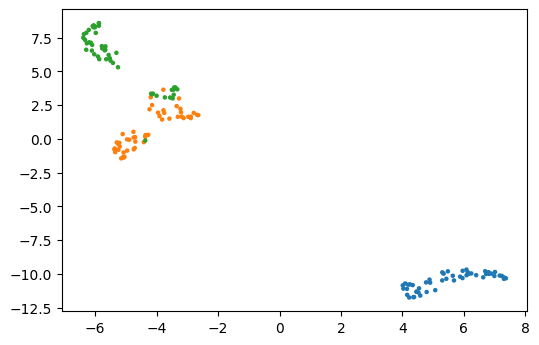

In [4]:
cmap = LinearSegmentedColormap.from_list('', colors[:len(np.unique(iris['target']))])
plt.figure(dpi=100)
plt.scatter(embedding.T[0], embedding.T[1], c=iris['target'], cmap=cmap, s=5)

# Iris data set

/home/leo/.virtualenvs/nbeigs/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components
/home/leo/.virtualenvs/nbeigs/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components
/home/leo/.virtualenvs/nbeigs/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components
/home/leo/.virtualenvs/nbeigs/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


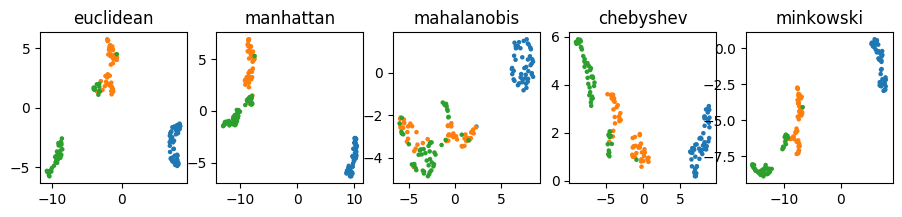

In [5]:
iris = load_iris()
compute_plot_iris(iris, n_neighbors=10)

# Boston house prices

/home/leo/.virtualenvs/nbeigs/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


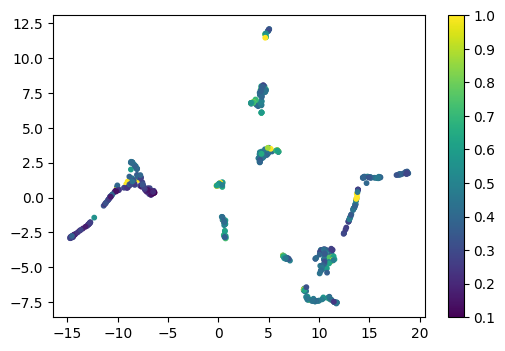

In [6]:
# load data set
houses = load_boston()

#get model and compute
model = umap.UMAP(n_neighbors=10)
embedding = model.fit_transform(houses['data'])

# plot
cmap = get_cmap('viridis')
colors = houses['target'] / houses['target'].max()
plt.figure(dpi=100)
plt.scatter(embedding.T[0], embedding.T[1], c=colors , cmap=cmap, s=10)
plt.colorbar()

/home/leo/.virtualenvs/nbeigs/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 4 separate connected components using meta-embedding (experimental)
  n_components
/home/leo/.virtualenvs/nbeigs/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


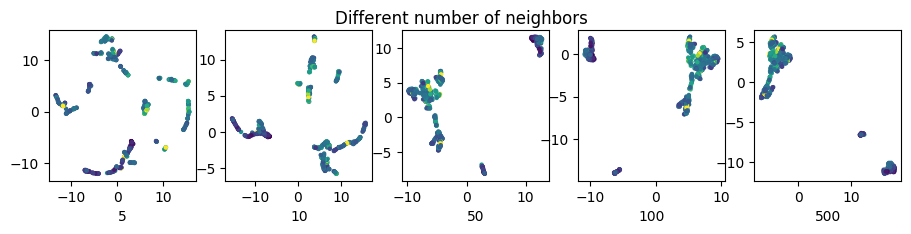

In [7]:
compute_plot_houses(houses)

# Cool stuff: prime numbers

https://gist.github.com/johnhw/dfc7b8b8519aac530ac97da226c17bd5

# Example in the wild: Eigenvalues of graph matrices

[Check out Figure 1 on this paper](https://appliednetsci.springeropen.com/articles/10.1007/s41109-019-0147-y)